In [903]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [904]:
companies = pd.read_csv("companies.csv", encoding='ISO-8859-1')

In [905]:
companies.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.name = companies.name.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

In [906]:
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/Eron,ERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [907]:
rounds2 = pd.read_csv("rounds2.csv", encoding = ('ISO-8859-1'))

In [908]:
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

In [909]:
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [910]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
print("Unique Companies in rounds2 is " , len(rounds2['company_permalink'].unique()))


Unique Companies in rounds2 is  66368


In [911]:
companies['permalink'] = companies['permalink'].str.lower()
print("Unique Companies in companies is " , len(companies['permalink'].unique()))


Unique Companies in companies is  66368


In [912]:
common = set(companies['permalink']).intersection(set(rounds2['company_permalink']))
print("The number of common elements between company_permalink and permalink is ",len(common))

The number of common elements between company_permalink and permalink is  66368


In [913]:
master_frame = pd.merge(rounds2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')
len(master_frame.index)

114949

In [914]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

## Checkpoint 2: Funding Type Analysis

### Percentage of null value in 'raised_amount_usd' column

In [915]:
print(round(100 * master_frame['raised_amount_usd'].isnull().sum()/len(master_frame['raised_amount_usd'])))

17


In [916]:
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000

In [917]:
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() | master_frame['category_list'].isnull())]

In [918]:
master_frame.shape

(88529, 16)

In [919]:
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') 
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]

In [920]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,0.700000,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,0.043360,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,0.719491,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


In [921]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         48364
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                2560
category_list                  0
status                         0
country_code                   0
state_code                  1532
region                      1031
city                        1028
founded_at                 11227
dtype: int64

In [922]:
df2 = master_frame.pivot_table(index=['funding_round_type'], values=['raised_amount_usd'], aggfunc = 'mean')
df2

,raised_amount_usd
funding_round_type,
angel,0.971574
private_equity,73.938486
seed,0.747794
venture,11.724223


In [923]:
master_frame.shape


(75124, 16)

In [924]:
venture_mean = round(master_frame[master_frame['funding_round_type']=='venture'].raised_amount_usd.mean() , 2)
print("venture_mean =" , venture_mean)

venture_mean = 11.72


In [925]:
angel_mean = round(master_frame[master_frame['funding_round_type']=='angel'].raised_amount_usd.mean() , 2)
print("angel_mean =" , angel_mean)

angel_mean = 0.97


In [926]:
seed_mean = round(master_frame[master_frame['funding_round_type']=='seed'].raised_amount_usd.mean() , 2)
print("seed_mean =" , seed_mean)

seed_mean = 0.75


In [927]:
equity_mean = round(master_frame[master_frame['funding_round_type']=='private_equity'].raised_amount_usd.mean() , 2)
print("equity_mean =" , equity_mean)

equity_mean = 73.94


In [928]:
b = {'venture': venture_mean, 'angel': angel_mean, 'seed': seed_mean, 'equity': equity_mean}
for inv in b:
    if b[inv] > 5 and b[inv] < 15:
        print("Ideal investment type for Spark Funds is:" , inv)

Ideal investment type for Spark Funds is: venture


In [929]:
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']


In [930]:
master_frame = master_frame.drop(['funding_round_type'], axis = 1)

In [931]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,B,05-01-2015,10.000000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,A,19-03-2008,2.000000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,NaN,21-12-2009,0.719491,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,B,09-11-2015,20.000000,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,NaN,03-01-2013,1.700000,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [932]:
master_frame = master_frame.drop(['funding_round_code', 'funding_round_permalink', 'funded_at','permalink', 'homepage_url',
                                 'state_code', 'region', 'city', 'founded_at','status'], axis = 1)

In [933]:
master_frame.head()

,company_permalink,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,10.000000,#fame,Media,IND
4,/organization/0-6-com,2.000000,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,0.719491,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,20.000000,H2O.ai,Analytics,USA
11,/organization/0xdata,1.700000,H2O.ai,Analytics,USA


## Checkpoint 3: Country Analysis
- Top nine countries which have received the highest total funding 

In [936]:
top9 = master_frame.pivot_table(values = 'raised_amount_usd', index = 'country_code',aggfunc = 'sum')
top9 = top9.sort_values(by = 'raised_amount_usd', ascending= False)
top9['raised_amount_usd']
top9 = top9.iloc[:9, ]
top9 = top9.reset_index()
top9

,country_code,raised_amount_usd
0,USA,420068.029342
1,CHN,39338.918773
2,GBR,20072.813004
3,IND,14261.508718
4,CAN,9482.217668
5,FRA,7226.851352
6,ISR,6854.350477
7,DEU,6306.921981
8,JPN,3167.647127


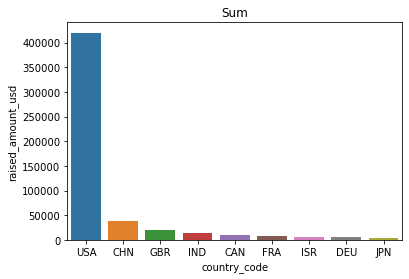

In [937]:
%matplotlib inline
sns.barplot(x="country_code", y="raised_amount_usd", data=top9)
plt.title("Sum")
plt.show()

In [938]:
master_frame = master_frame[(master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND')]

## Checkpoint 4: Sector Analysis 1

In [939]:

master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])

In [940]:
mapping = pd.read_csv("mapping.csv")
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)

In [941]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [942]:
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports','Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [943]:
master_frame = master_frame.merge(mapping, how = 'left', on = 'category_list')
master_frame.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector
0,/organization/-fame,10.0,#fame,Media,IND,Entertainment
1,/organization/0xdata,20.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,1.7,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,8.9,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,5.0,1 Mainstream,Apps,USA,"News, Search and Messaging"


In [944]:
master_frame['company_permalink'] = master_frame['company_permalink'].apply(lambda x: x.replace("/",""))

In [945]:
master_frame = master_frame[~master_frame['main_sector'].isnull()]

In [946]:
master_frame.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector
0,organization-fame,10.0,#fame,Media,IND,Entertainment
1,organization0xdata,20.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
2,organization0xdata,1.7,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
3,organization0xdata,8.9,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,organization1-mainstream,5.0,1 Mainstream,Apps,USA,"News, Search and Messaging"


In [947]:
master_frame = master_frame.rename(columns = {"category_list":"primary_sector"})

In [948]:
master_frame.head()

,company_permalink,raised_amount_usd,name,primary_sector,country_code,main_sector
0,organization-fame,10.0,#fame,Media,IND,Entertainment
1,organization0xdata,20.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
2,organization0xdata,1.7,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
3,organization0xdata,8.9,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,organization1-mainstream,5.0,1 Mainstream,Apps,USA,"News, Search and Messaging"


In [949]:
D2 = master_frame[(master_frame['country_code'] == 'GBR') | (master_frame['country_code'] == 'IND') | (master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D2_new = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count'])
D2_new.columns = [''.join(col) for col in D2_new.columns]
D2_new = D2_new.rename(columns = {'raised_amount_usdsum':'TotalAmount','raised_amount_usdcount':'TotalCount'})
D2 = D2.merge(D2_new, how='left', on ='main_sector')
D2.head()

,company_permalink,raised_amount_usd,name,primary_sector,country_code,main_sector,TotalAmount,TotalCount
0,organization-fame,10.000000,#fame,Media,IND,Entertainment,7237.954637,803
1,organization0xdata,8.900000,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising",29159.510556,3282
2,organization1-mainstream,5.000000,1 Mainstream,Apps,USA,"News, Search and Messaging",18655.171125,1953
3,organization10-minutes-with,4.000000,10 Minutes With,Education,GBR,Others,37142.734088,3750
4,organization128-technology,11.999347,128 Technology,Service Providers,USA,Others,37142.734088,3750


## Checkpoint 5: Sector Analysis 2

In [952]:
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D1_new = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count'])

In [953]:
D1_new

raised_amount_usd      
                                                      sum count
main_sector                                                    
Automotive & Sports                           1454.104361   167
Cleantech / Semiconductors                   21206.628192  2300
Entertainment                                 5099.197982   591
Health                                        8211.859357   909
Manufacturing                                 7258.553378   799
News, Search and Messaging                   13959.567428  1582
Others                                       26321.007002  2950
Social, Finance, Analytics, Advertising      23807.376964  2714

In [954]:
D1_new.columns = [''.join(col) for col in D1_new.columns]

In [955]:
D1_new

,raised_amount_usdsum,raised_amount_usdcount
main_sector,,
Automotive & Sports,1454.104361,167
Cleantech / Semiconductors,21206.628192,2300
Entertainment,5099.197982,591
Health,8211.859357,909
Manufacturing,7258.553378,799
"News, Search and Messaging",13959.567428,1582
Others,26321.007002,2950
"Social, Finance, Analytics, Advertising",23807.376964,2714


In [956]:
D1_new = D1_new.rename(columns = {'raised_amount_usdsum':'TotalAmount','raised_amount_usdcount':'TotalCount'})

In [957]:
D1_new

,TotalAmount,TotalCount
main_sector,,
Automotive & Sports,1454.104361,167
Cleantech / Semiconductors,21206.628192,2300
Entertainment,5099.197982,591
Health,8211.859357,909
Manufacturing,7258.553378,799
"News, Search and Messaging",13959.567428,1582
Others,26321.007002,2950
"Social, Finance, Analytics, Advertising",23807.376964,2714


In [958]:
D1 = D1.merge(D1_new, how='left', on ='main_sector')
D1.head()

,company_permalink,raised_amount_usd,name,primary_sector,country_code,main_sector,TotalAmount,TotalCount
0,organization0xdata,8.900000,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising",23807.376964,2714
1,organization1-mainstream,5.000000,1 Mainstream,Apps,USA,"News, Search and Messaging",13959.567428,1582
2,organization128-technology,11.999347,128 Technology,Service Providers,USA,Others,26321.007002,2950
3,organization1366-technologies,15.000000,1366 Technologies,Manufacturing,USA,Manufacturing,7258.553378,799
4,organization1366-technologies,5.000000,1366 Technologies,Manufacturing,USA,Manufacturing,7258.553378,799


In [959]:
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D2_new = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count'])
D2_new.columns = [''.join(col) for col in D2_new.columns]
D2_new = D2_new.rename(columns = {'raised_amount_usdsum':'TotalAmount','raised_amount_usdcount':'TotalCount'})
D2 = D2.merge(D2_new, how='left', on ='main_sector')
D2.head()

,company_permalink,raised_amount_usd,name,primary_sector,country_code,main_sector,TotalAmount,TotalCount
0,organization365scores,5.500000,365Scores,Android,GBR,"Social, Finance, Analytics, Advertising",1089.404014,133
1,organization7digital,8.468328,7digital,Content Creators,GBR,Entertainment,482.784687,56
2,organization7digital,10.000000,7digital,Content Creators,GBR,Entertainment,482.784687,56
3,organization90min,15.000000,90min,Media,GBR,Entertainment,482.784687,56
4,organization90min,5.800000,90min,Media,GBR,Entertainment,482.784687,56


In [960]:
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D3_new = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count'])
D3_new.columns = [''.join(col) for col in D3_new.columns]
D3_new = D3_new.rename(columns = {'raised_amount_usdsum':'TotalAmount','raised_amount_usdcount':'TotalCount'})
D3 = D3.merge(D3_new, how='left', on ='main_sector')
D3.head()

,company_permalink,raised_amount_usd,name,primary_sector,country_code,main_sector,TotalAmount,TotalCount
0,organization-fame,10.000000,#fame,Media,IND,Entertainment,280.830000,33
1,organization21diamonds-india,6.369507,21Diamonds,E-Commerce,IND,Others,1013.409507,110
2,organizationa-little-world,6.410000,A LITTLE WORLD,Finance,IND,"Social, Finance, Analytics, Advertising",550.549550,60
3,organizationadlabs-imagica,8.180000,Adlabs Imagica,Entertainment,IND,Entertainment,280.830000,33
4,organizationagile,5.740000,Agile,Finance,IND,"Social, Finance, Analytics, Advertising",550.549550,60


### Total Number of Investment

In [961]:
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

12012
619
328


### Total Amount of Investment

In [962]:
print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))

107318.29
5365.23
2949.54


In [963]:
D1_new.TotalCount.sort_values(ascending = False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: TotalCount, dtype: int64

In [964]:
D1_new.reset_index()

,main_sector,TotalAmount,TotalCount
0,Automotive & Sports,1454.104361,167
1,Cleantech / Semiconductors,21206.628192,2300
2,Entertainment,5099.197982,591
3,Health,8211.859357,909
4,Manufacturing,7258.553378,799
5,"News, Search and Messaging",13959.567428,1582
6,Others,26321.007002,2950
7,"Social, Finance, Analytics, Advertising",23807.376964,2714


In [965]:
D2_new.TotalCount.sort_values(ascending = False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: TotalCount, dtype: int64

In [966]:
D3_new.TotalCount.sort_values(ascending = False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: TotalCount, dtype: int64

### For top sector in USA which company received the highest investment

In [967]:
Company = D1[D1['main_sector'] == 'Others']
D1_New = Company.groupby(['company_permalink']).sum(['raised_amount_usd'])
D1_New.raised_amount_usd.sort_values(ascending = False).head(1)

company_permalink
organizationvirtustream    64.3
Name: raised_amount_usd, dtype: float64

In [968]:
Company = D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising']
D1_New = Company.groupby(['company_permalink']).sum(['raised_amount_usd'])
D1_New.raised_amount_usd.sort_values(ascending = False).head(1)


company_permalink
organizationshotspotter    67.933006
Name: raised_amount_usd, dtype: float64

In [969]:
Company = D2[D2['main_sector'] == 'Others']
D2_New = Company.groupby(['company_permalink']).sum(['raised_amount_usd'])
D2_New.raised_amount_usd.sort_values(ascending = False).head(1)

company_permalink
organizationelectric-cloud    37.0
Name: raised_amount_usd, dtype: float64

In [972]:
Company = D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising']
D2_New = Company.groupby(['company_permalink']).sum(['raised_amount_usd'])
D2_New.raised_amount_usd.sort_values(ascending = False).head(1)

company_permalink
organizationcelltick-technologies    37.5
Name: raised_amount_usd, dtype: float64

In [971]:
Company = D3[D3['main_sector'] == 'Others']
D3_New = Company.groupby(['company_permalink']).sum(['raised_amount_usd'])
D3_New.raised_amount_usd.sort_values(ascending = False).head(1)

company_permalink
organizationfirstcry-com    39.0
Name: raised_amount_usd, dtype: float64

In [204]:
Company = D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising']
D3_New = Company.groupby(['company_permalink']).sum(['raised_amount_usd'])
D3_New.raised_amount_usd.sort_values(ascending = False).head(1)

company_permalink
organizationmanthan-systems    51.0
Name: raised_amount_usd, dtype: float64

## Checkpoint 6: Plots

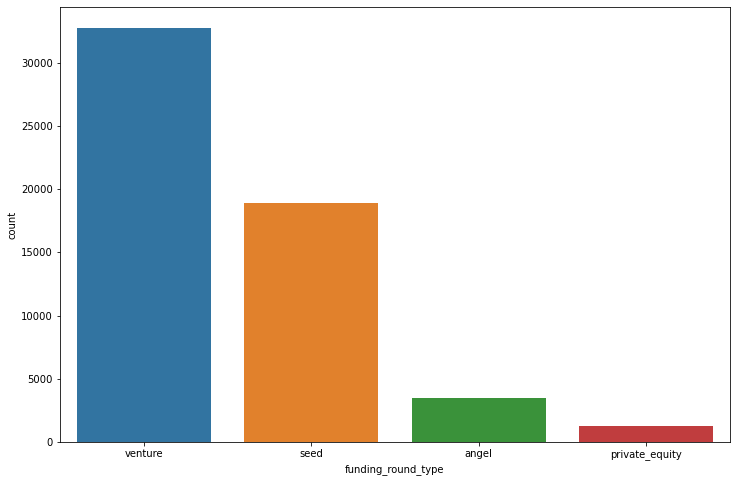

In [726]:
plt.figure(figsize=(12, 8))
sns.countplot(x="funding_round_type", data=master_frame)
plt.show()

In [725]:

D0 = master_frame[['raised_amount_usd','funding_round_type']].groupby('funding_round_type').agg(['mean'])
D0.columns = [''.join(col) for col in D0.columns]
D0 = D0.rename(columns = {'raised_amount_usdmean':'TotalAmount'})
D0.TotalAmount = round(D0.TotalAmount,1)
D11 = D0.reset_index()
D11

,funding_round_type,TotalAmount
0,angel,0.8
1,private_equity,60.0
2,seed,0.8
3,venture,8.0


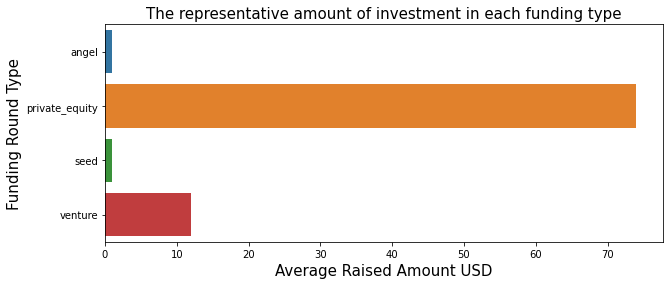

In [556]:
plt.figure(figsize=(10, 4))
sns.barplot(y='funding_round_type',x='TotalAmount', data = D11)
plt.xlabel('Average Raised Amount USD', fontsize =15)
plt.ylabel('Funding Round Type', fontsize = 15)
plt.title('The representative amount of investment in each funding type',fontsize = 15)
plt.show()

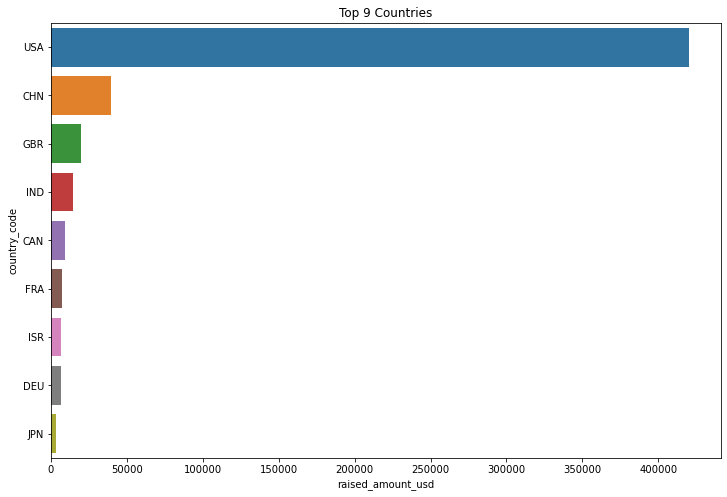

In [541]:
%matplotlib inline
plt.figure(figsize=(12, 8))
sns.barplot(y="country_code", x="raised_amount_usd", data=top9)
plt.title("Top 9 Countries")
plt.show()

In [451]:
D1_new = D1_new.nlargest(3,['TotalCount'])
D1_new

,TotalAmount,TotalCount
main_sector,,
Others,26321.007002,2950
"Social, Finance, Analytics, Advertising",23807.376964,2714
Cleantech / Semiconductors,21206.628192,2300


In [477]:
D2_new = D2_new.nlargest(3,['TotalCount'])
D2_new

,TotalAmount,TotalCount
main_sector,,
Others,1283.624289,147
"Social, Finance, Analytics, Advertising",1089.404014,133
Cleantech / Semiconductors,1150.139665,128


In [478]:
D3_new = D3_new.nlargest(3,['TotalCount'])
D3_new

,TotalAmount,TotalCount
main_sector,,
Others,1013.409507,110
"Social, Finance, Analytics, Advertising",550.549550,60
"News, Search and Messaging",433.834545,52


In [455]:
D1_New = D1_new.nlargest(3,['TotalCount']).reset_index()

In [456]:
D1_New

,main_sector,TotalAmount,TotalCount
0,Others,26321.007002,2950
1,"Social, Finance, Analytics, Advertising",23807.376964,2714
2,Cleantech / Semiconductors,21206.628192,2300


In [479]:
D2_New = D2_new.nlargest(3,['TotalCount']).reset_index()

In [480]:
D2_New

,main_sector,TotalAmount,TotalCount
0,Others,1283.624289,147
1,"Social, Finance, Analytics, Advertising",1089.404014,133
2,Cleantech / Semiconductors,1150.139665,128


In [482]:
D3_New = D3_new.nlargest(3,['TotalCount']).reset_index()

In [483]:
D3_New

,main_sector,TotalAmount,TotalCount
0,Others,1013.409507,110
1,"Social, Finance, Analytics, Advertising",550.549550,60
2,"News, Search and Messaging",433.834545,52


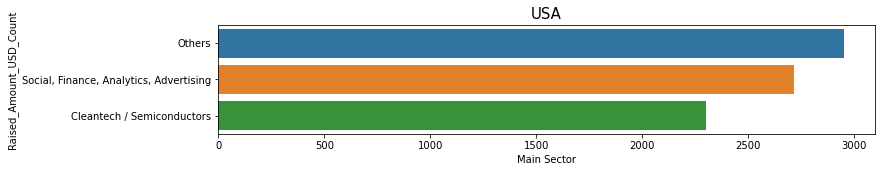

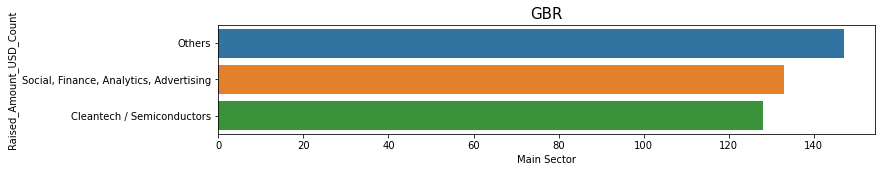

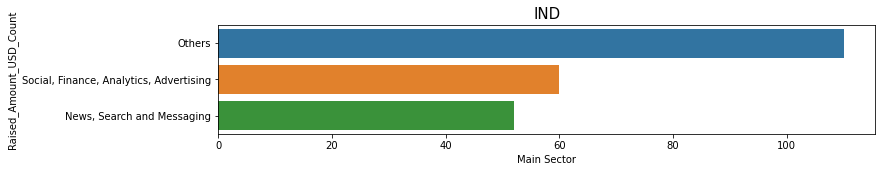

In [505]:
plt.figure(figsize=(40,2))
plt.subplot(1,3,1)
sns.barplot( y='main_sector', x= 'TotalCount', data=D1_New)
plt.xlabel('Main Sector',fontsize = 10)
plt.ylabel('Raised_Amount_USD_Count',fontsize = 10)
plt.title('USA',fontsize = 15)
plt.show()
plt.figure(figsize=(40,2))
plt.subplot(1,3,2)
sns.barplot( y='main_sector', x= 'TotalCount', data=D2_New)
plt.xlabel('Main Sector',fontsize = 10)
plt.ylabel('Raised_Amount_USD_Count',fontsize = 10)
plt.title('GBR',fontsize = 15)
plt.show()
plt.figure(figsize=(40,2))
plt.subplot(1,3,3)
sns.barplot( y='main_sector', x= 'TotalCount', data=D3_New)
plt.xlabel('Main Sector',fontsize = 10)
plt.ylabel('Raised_Amount_USD_Count',fontsize = 10)
plt.title('IND',fontsize = 15)
plt.show()
